# Deep learning framework example: Named Entity Recognition

This notebook demonstrates how to use the deeplearning API to train and test the model on the [CoNNL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/).  The task is to identify named entities (i.e. people, organizations etc).

**Important**: Please see the Movie Review notebook example in the `zensols.movie` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
app_root_dir = '..'
sys.path.append(app_root_dir + '/src')
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from ner import AppConfig, NERModelFacade

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
env = {'app_root': app_root_dir,
       'gpu_primary_index': 1}
config = AppConfig(config_file=app_root_dir + '/resources/conf', env=env)

def create_facade():
    """Create and return a facade with columns that fit a notebook.
 
    """
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    facade = NERModelFacade(config)
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

executor:
  model: NER
  feature splits:
    split stash splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
        total: 20744


2020-12-29 13:50:49,885[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1


    total this instance: 20744
    keys consistent: True
    delegate:
      key splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
      total: 20744
  batch splits:
    split stash splits:
        test: 27 (16.6%)
        train: 110 (67.5%)
        dev: 26 (16.0%)
        total: 163
    total this instance: 163
    keys consistent: True
    delegate:
      name: sent_batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 128
      data_point_id_sets_path: ../data/batch/b128/keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'syns', 'mask', 'glove_50_embedding', 'ents', 'tags'}
      priming: False
  network settings:
    name: net_settings
    recurrent_crf_settings:
      name: recurrent_crf_settings
      dropout: 0.1
      network_type: lstm
      bidirectional: True
      hidden_size: 24
      num_layers: 1
      num_labels: 9
      dec

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2020-12-29 13:50:49,897[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-29 13:50:49,898[INFO]zensols.deeplearn.model.facade: training...
2020-12-29 13:50:49,900[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2020-12-29 13:51:00,289[INFO]zensols.deeplearn.model.executor.status: loaded 136 batches in 10s
2020-12-29 13:51:00,290[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-29 13:51:00,294[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-29 13:51:00,323[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:1 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 0/2 [00:00<?, ?it/s]2020-12-29 13:51:00,326[INFO]zensols.deeplearn.model.exec

Name: NER: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/29/2020 13:51:00:326734
    ended: 12/29/2020 13:51:21:905043
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 2/2
    ave/min loss: 142094.56825/49487.18585
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 2/2
    ave/min loss: 132804.42318/22366.33238
    accuracy: 0.838 (42904/51217)
    micro: F1: 0.838, precision: 0.838, recall: 0.838
    macro: F1: 0.134, precision: 0.484, recall: 0.129
  test:
    started: 12/29/2020 13:51:23:844169
    ended: 12/29/2020 13:51:24:951969
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.830 (38477/46361)
    micro: F1: 0.830, precision: 0.830, recall: 0.830
    macro: F1: 0.134, precision: 0.473, recall: 0.12

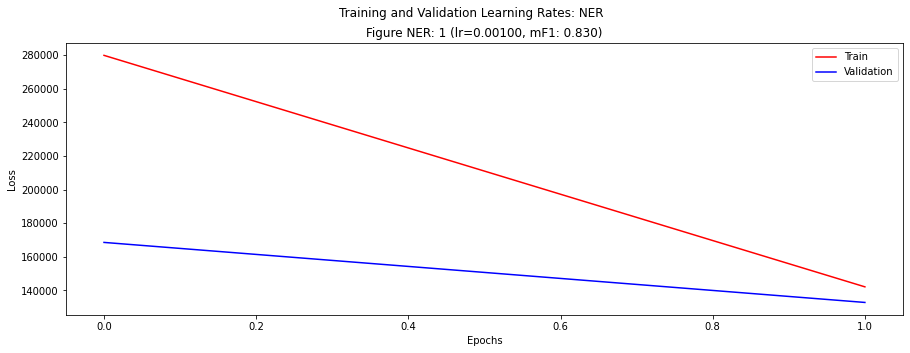

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

2020-12-29 13:51:25,975[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-29 13:51:25,976[INFO]zensols.deeplearn.model.facade: training...
2020-12-29 13:51:25,977[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-12-29 13:51:25,978[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-29 13:51:26,007[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-29 13:51:26,036[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:1 for 20 epochs using learning rate 0.01
  0%|                                                                                            | 0/20 [00:00<?, ?it/s]2020-12-29 13:51:26,038[INFO]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:13229.191|va min:23099.772|va:23322.4

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 12/29/2020 13:51:26:039428
    ended: 12/29/2020 13:55:07:739153
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 20/20
    ave/min loss: 13229.19105/5226.00700
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 17/20
    ave/min loss: 23099.77188/2329.99934
    accuracy: 0.965 (49402/51217)
    micro: F1: 0.965, precision: 0.965, recall: 0.965
    macro: F1: 0.817, precision: 0.850, recall: 0.791
  test:
    started: 12/29/2020 13:55:07:996234
    ended: 12/29/2020 13:55:09:109799
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.953 (44189/46361)
    micro: F1: 0.953, precision: 0.953, recall: 0.953
    macro: F1: 0.784, precision: 0.788, recall: 0.782

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

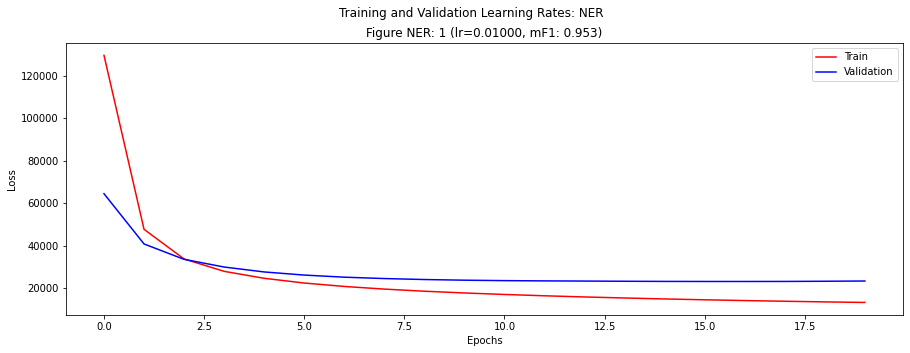

In [5]:
facade.learning_rate = 0.01
facade.epochs = 20
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2020-12-29 13:55:09,486[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-29 13:55:09,487[INFO]zensols.deeplearn.model.facade: training...
2020-12-29 13:55:09,488[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-12-29 13:55:09,489[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-29 13:55:09,518[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-29 13:55:09,547[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:1 for 25 epochs using learning rate 0.01
  0%|                                                                                            | 0/25 [00:00<?, ?it/s]2020-12-29 13:55:09,550[INFO]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:11535.914|va min:24081.633|va:24809.2

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 12/29/2020 13:55:09:551436
    ended: 12/29/2020 13:59:38:344002
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 25/25
    ave/min loss: 11535.91390/4058.91177
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 13/25
    ave/min loss: 24081.63332/2807.66302
    accuracy: 0.963 (49317/51217)
    micro: F1: 0.963, precision: 0.963, recall: 0.963
    macro: F1: 0.815, precision: 0.843, recall: 0.791
  test:
    started: 12/29/2020 13:59:38:612706
    ended: 12/29/2020 13:59:39:745115
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.955 (44274/46361)
    micro: F1: 0.955, precision: 0.955, recall: 0.955
    macro: F1: 0.792, precision: 0.792, recall: 0.793

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

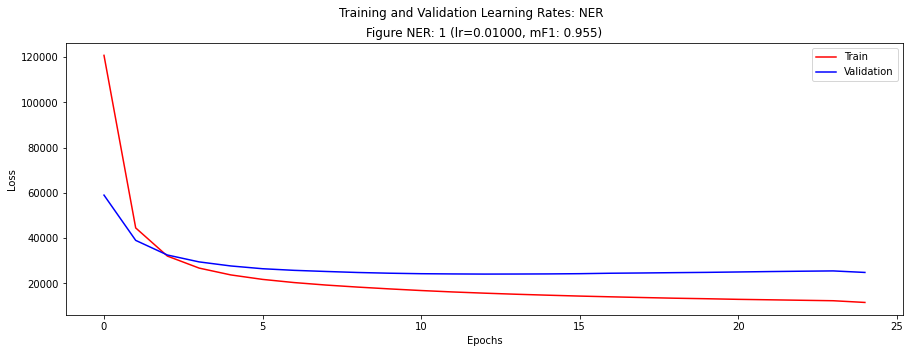

In [6]:
facade.learning_rate = 0.01
facade.epochs = 25
facade.embedding = 'glove_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2020-12-29 13:59:40,105[INFO]zensols.deeplearn.model.facade: clearing
2020-12-29 13:59:40,126[INFO]zensols.deeplearn.model.facade: creating new executor
2020-12-29 13:59:40,131[INFO]zensols.deepnlp.embed.domain: reusing already cached from use cuda: False, device: cpu
2020-12-29 13:59:40,143[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-29 13:59:40,143[INFO]zensols.deeplearn.model.facade: training...
2020-12-29 13:59:40,167[INFO]zensols.deeplearn.model.executor.status: batch iteration: cpu, limit: 9223372036854775807, caching: False, cached: 0
2020-12-29 13:59:47,329[INFO]zensols.deeplearn.model.executor.status: loaded 136 batches in 7s
2020-12-29 13:59:47,329[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-29 13:59:47,335[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-29 13:59:47,363[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnl

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 12/29/2020 13:59:47:366774
    ended: 12/29/2020 14:04:23:816930
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 25/25
    ave/min loss: 12220.46752/4870.85565
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 15/25
    ave/min loss: 23481.61531/2810.99747
    accuracy: 0.964 (49358/51217)
    micro: F1: 0.964, precision: 0.964, recall: 0.964
    macro: F1: 0.818, precision: 0.843, recall: 0.798
  test:
    started: 12/29/2020 14:04:25:623789
    ended: 12/29/2020 14:04:26:984224
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.950 (44038/46361)
    micro: F1: 0.950, precision: 0.950, recall: 0.950
    macro: F1: 0.780, precision: 0.776, recall: 0.785

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

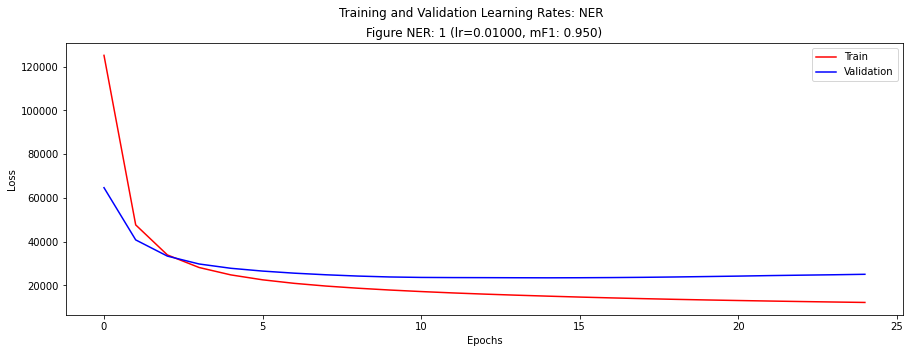

In [7]:
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2020-12-29 14:04:27,348[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-29 14:04:27,350[INFO]zensols.deeplearn.model.facade: training...
2020-12-29 14:04:27,351[INFO]zensols.deeplearn.model.executor.status: batch iteration: cpu, limit: 9223372036854775807, caching: False, cached: 0
2020-12-29 14:04:34,439[INFO]zensols.deeplearn.model.executor.status: loaded 136 batches in 7s
2020-12-29 14:04:34,439[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-29 14:04:34,512[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-29 14:04:34,551[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:1 for 80 epochs using learning rate 0.01
  0%|                                                   | 0/80 [00:00<?, ?it/s]2020-12-29 14:04:34,554[INFO]zensols.deeplearn.model.executor.status: watching update file ../targ

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 12/29/2020 14:04:34:554777
    ended: 12/29/2020 14:18:57:741908
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 80/80
    ave/min loss: 9516.79209/3916.32998
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 17/80
    ave/min loss: 22164.03300/3077.35639
    accuracy: 0.966 (49473/51217)
    micro: F1: 0.966, precision: 0.966, recall: 0.966
    macro: F1: 0.830, precision: 0.863, recall: 0.802
  test:
    started: 12/29/2020 14:18:59:773922
    ended: 12/29/2020 14:19:01:202343
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.953 (44201/46361)
    micro: F1: 0.953, precision: 0.953, recall: 0.953
    macro: F1: 0.786, precision: 0.796, recall: 0.777


zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

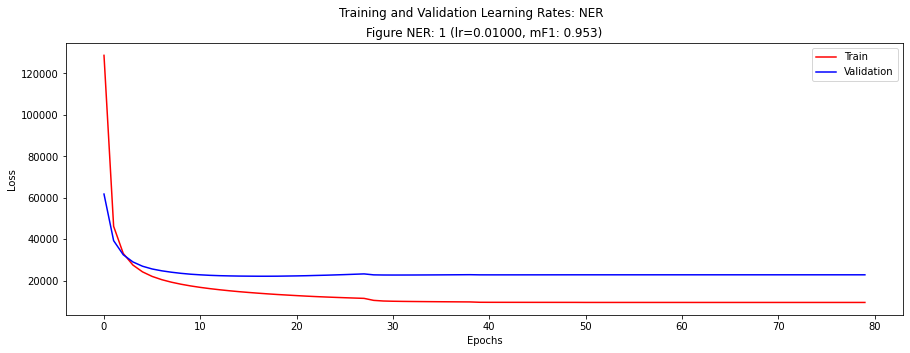

In [8]:
facade.epochs = 60
facade.embedding = 'bert_embedding'
facade.net_settings.add_attributes = ()
facade.train()
facade.test()
facade.write_result()
facade.plot_result()